In [154]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *

In [117]:
def PullTicket(symbol,start='2015-1-1', end='2020-3-10'):
    tickerData = yf.Ticker(symbol)
    tickerdf = tickerData.history(period='1d', start=start, end=end)
    tickerdf = pd.DataFrame(tickerdf).reset_index()
    tickerdf=tickerdf[['Date','Close']]
    tickerdf.columns = ['Date',symbol]
    return tickerdf

tickers = ['AAL', 'MCK','DAL','XOM','CVX']

AAL = PullTicket(tickers[0])
MCK = PullTicket(tickers[1])
DAL = PullTicket(tickers[2])
XOM = PullTicket(tickers[3])
CVX = PullTicket(tickers[4])

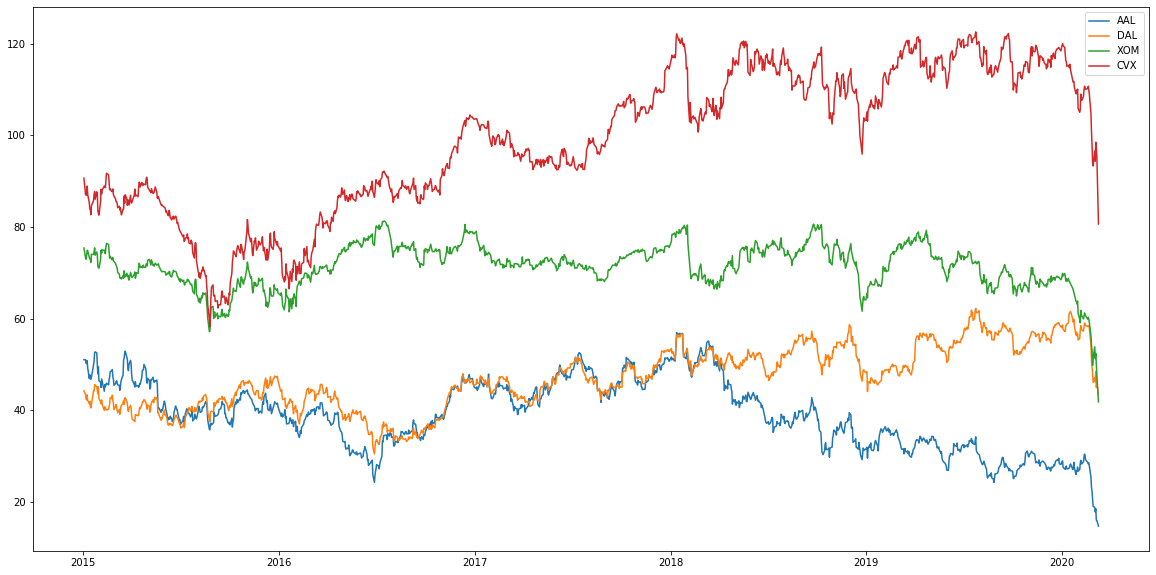

In [118]:

plt.figure(figsize=(20,10))
plt.plot(AAL['Date'],AAL['AAL'], label ='AAL')
plt.plot(DAL['Date'],DAL['DAL'], label ='DAL')
plt.plot(XOM['Date'],XOM['XOM'], label ='XOM')
plt.plot(CVX['Date'],CVX['CVX'], label ='CVX')
plt.legend()

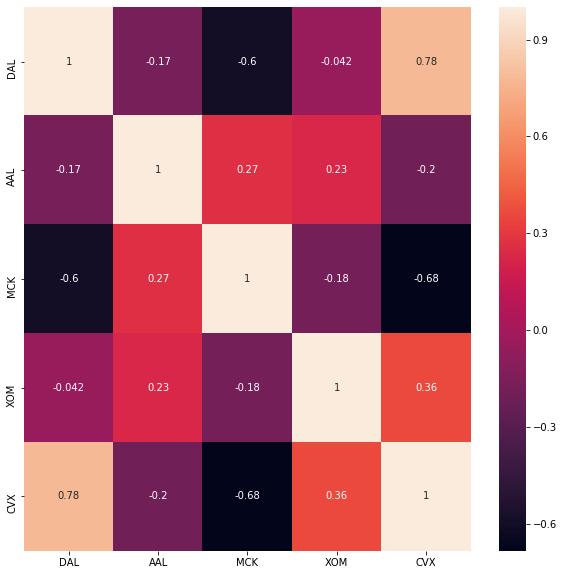

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.concat([DAL,
           AAL.iloc[:,1],
           MCK.iloc[:,1],
          XOM.iloc[:,1],
           CVX.iloc[:,1]],
          axis=1).corr(),annot=True)

In [136]:
stockdf = pd.concat([DAL,
           AAL.iloc[:,1],
           MCK.iloc[:,1],
          XOM.iloc[:,1],
           CVX.iloc[:,1]],
          axis=1)

In [139]:
stockdf.set_index('Date',inplace=True)

In [171]:
w = [0.0,0.0,0.0,0.0,1.0]

In [172]:
#daily returns
ret_data = stockdf.pct_change()[1:]

In [173]:
weighted_returns = (w * ret_data)

In [174]:
port_ret = weighted_returns.sum(axis=1)
port_ret

Date
2015-01-05   -0.039916
2015-01-06   -0.000459
2015-01-07   -0.000804
2015-01-08    0.022884
2015-01-09   -0.020011
2015-01-12   -0.021452
2015-01-13   -0.015944
2015-01-14   -0.002859
2015-01-15   -0.011828
2015-01-16    0.023818
2015-01-20    0.012872
2015-01-21    0.015856
2015-01-22    0.007116
2015-01-23   -0.019031
2015-01-26    0.018936
2015-01-27   -0.005701
2015-01-28   -0.041968
2015-01-29   -0.006822
2015-01-30   -0.004579
2015-02-02    0.034383
2015-02-03    0.032772
2015-02-04   -0.010766
2015-02-05    0.008821
2015-02-06    0.002725
2015-02-09    0.007475
2015-02-10   -0.002248
2015-02-11   -0.001803
2015-02-12    0.017946
2015-02-13    0.017297
2015-02-17   -0.003379
                ...   
2020-01-27   -0.013115
2020-01-28    0.006690
2020-01-29   -0.006828
2020-01-30    0.009350
2020-01-31   -0.038234
2020-02-03   -0.008026
2020-02-04    0.005426
2020-02-05    0.032096
2020-02-06   -0.007155
2020-02-07   -0.005082
2020-02-10    0.007801
2020-02-11    0.012993
2020-0

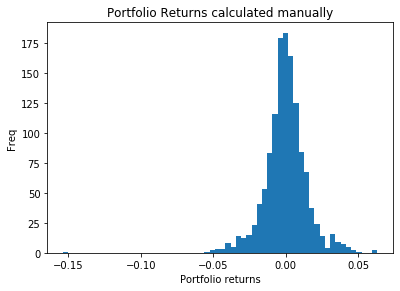

In [175]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show(); 

In [177]:
mean_ret = port_ret.mean()
std_returns = port_ret.std()
print(mean_ret)

1.8716330565244033e-05


In [179]:
mean_ret*100

0.0018716330565244034